In [92]:
import pandas as pd
import numpy as np

df = pd.read_csv('Car details v3.csv')
print(df.shape)
df.info
df.dtypes

(8128, 13)


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

#Data Preprocessing

In [93]:
#checking the null values
df.isnull().sum()
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()



(7906, 13)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [94]:
#checking the distribution of categorical data
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64
seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64
owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64


In [95]:
#encoding the categorical datas into numerical data(changing data types)
df.replace({'fuel':{"Diesel": 0, "Petrol": 1, "CNG": 2, "LPG": 3}},inplace=True)
df
df.replace({'seller_type':{"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2}},inplace=True)
df.replace({'transmission':{"Manual": 0, "Automatic": 1}},inplace=True)
df.replace({'owner':{
    "First Owner": 0,
    "Second Owner": 1,
    "Third Owner": 2,
    "Fourth & Above Owner": 3,
    "Test Drive Car": 4
}},inplace=True)
df
df.dtypes
df['seats'] = df['seats'].astype(int)
df
df.to_csv('car_data.csv',index=False)

C:\Users\Zwe Thiha\AppData\Local\Temp\ipykernel_12996\4286261160.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{"Diesel": 0, "Petrol": 1, "CNG": 2, "LPG": 3}},inplace=True)
C:\Users\Zwe Thiha\AppData\Local\Temp\ipykernel_12996\4286261160.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2}},inplace=True)
C:\Users\Zwe Thiha\AppData\Local\Temp\ipykernel_12996\4286261160.py:5: FutureWarning: Downcasting behavior in `replace` is dep

Data Splitting 

In [96]:
#select the dependent and target
sel_feature = ['year','km_driven','fuel','seller_type','transmission']
X = df[sel_feature].values
y = df['selling_price'].values

#import the library to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#print the size of the training and testing data
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)



(5534, 5) (2372, 5)
(5534,) (2372,)


#Use scikit learn pipelearn

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree = 5,
                                     include_bias=False)),
         ('liReg', LinearRegression())]

parameters = {"poly__degree": [2, 3, 4, 5,7,9]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(pipeline, parameters,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=True)

poly_grid.fit(X_train,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=True)

#check the parameter

In [98]:
#best paraemter
best_parameters = poly_grid.best_params_

print('The best order is:' , best_parameters)

The best order is: {'poly__degree': 2}


Perform the predictions

In [99]:
import numpy as np
#predicting the price for the testing data
ytest_pred = poly_grid.predict(X_test)
#predicting the price for the training data
ytrain_pred = poly_grid.predict(X_train)

dftrain_result = pd.DataFrame({"Actual": y_train,"Prediction":np.round(ytrain_pred)})
print(dftrain_result)
dftest_result = pd.DataFrame({"Actual": y_test,"Prediction":np.round(ytest_pred)})
print(dftest_result)

       Actual  Prediction
0      600000    567750.0
1     1100000    349944.0
2      250000    452096.0
3      250000    440250.0
4      740000   1040466.0
...       ...         ...
5529   711000    623576.0
5530   411000    391550.0
5531   110000    190302.0
5532   900000    814386.0
5533   800000   1121026.0

[5534 rows x 2 columns]
      Actual  Prediction
0     501000    673208.0
1     440000    566252.0
2     140000    381896.0
3     476999    378990.0
4     620000   1205386.0
...      ...         ...
2367  220000    305740.0
2368  175000    445892.0
2369  525000   1560386.0
2370  650000    536430.0
2371  650000   2178810.0

[2372 rows x 2 columns]


Visualization 

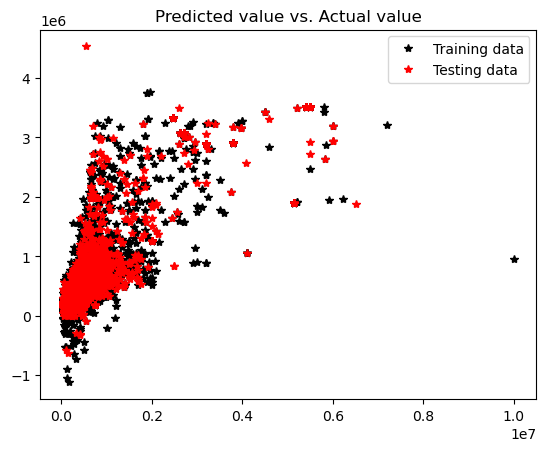

In [100]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(y_train, ytrain_pred, 'k*')
plt.plot(y_test, ytest_pred, 'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()


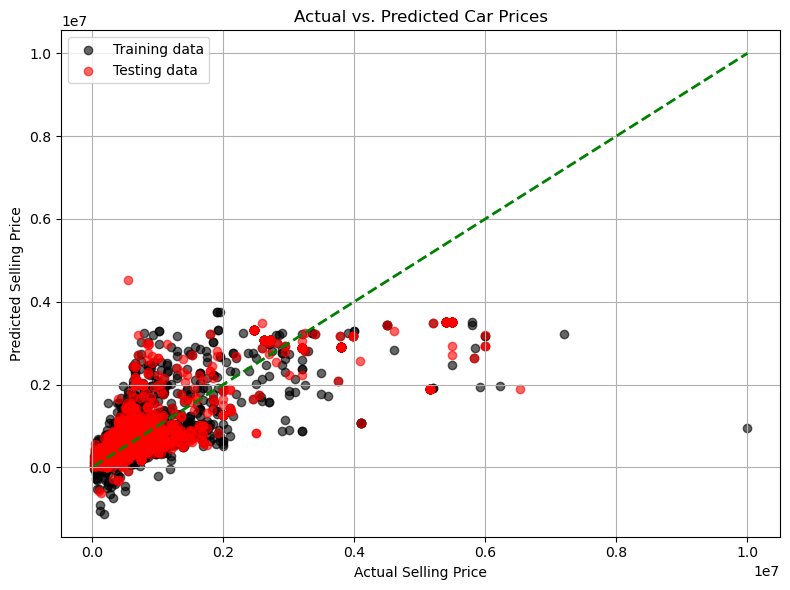

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train, ytrain_pred, color='black', label='Training data', alpha=0.6)
plt.scatter(y_test, ytest_pred, color='red', label='Testing data', alpha=0.6)

# Ideal line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'g--', lw=2)

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluate the results using metrics

In [102]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evaluate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evaluate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)


Mean absolute error:  257563.2753885074
Mean squared error:  252684033739.4944
R2 score is:  0.6158579995870848
Mean absolute error:  252969.25505902193
Mean squared error:  241438919730.05103
R2 score is:  0.6402994368044137
